### Detection of vehicles from aerial images

Imagine The University of Utah is starting a sustainability initiative and wants to encourage the campus community to take alternative transport to school.

As a baseline, they have assigned you with the task of counting how many cars are currently on campus from aerial images. 

Run the code below to import an aerial image of cars near the Warnock Engineering Building (source: Google Earth).

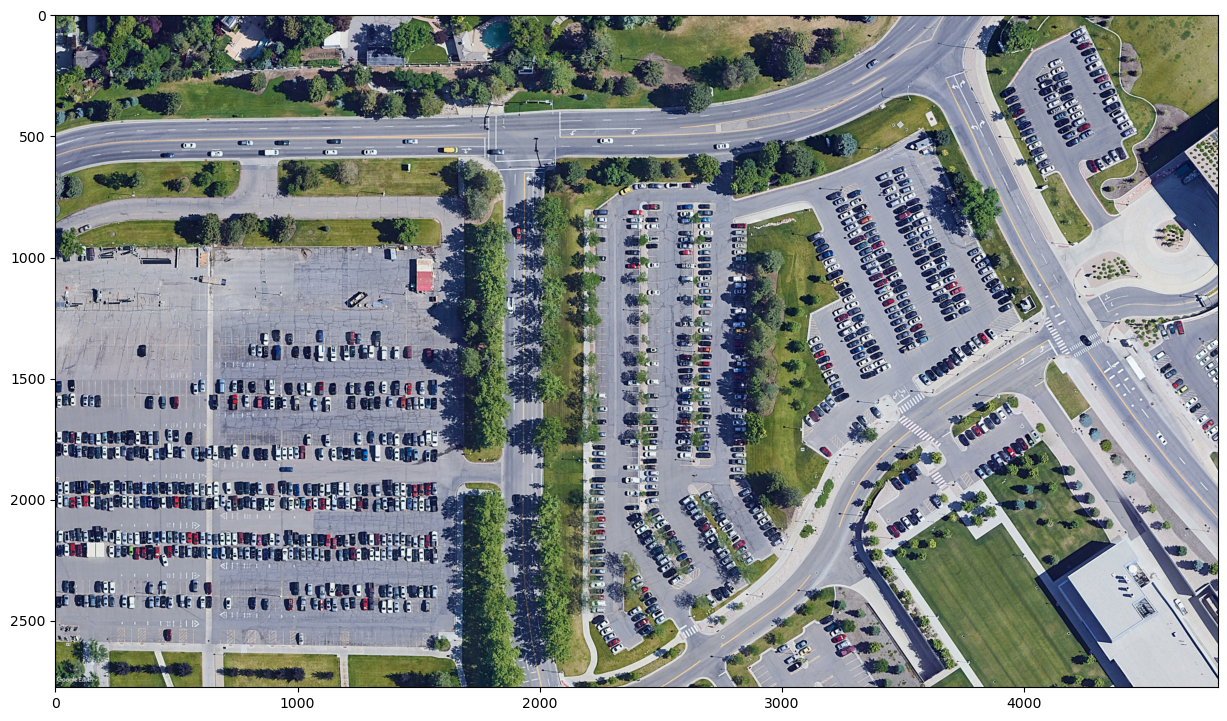

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
car_image = plt.imread('cars.jpg')
f, ax = plt.subplots(figsize = [15,10])
ax.imshow(car_image);
plt.show()

**Problem (2.5 Points)**

Write a function, called `sub_image` that extracts a 36 x 36-pixel sample from the `car_image` Numpy array.

**Hint:** this is very similar to a collaborative coding worksheet.

Unlike the code we wrote in class, your function should input a **center pixel** index, and extract the **36 x 36 pixel** data around it.

For example

`sub_image(50,60)`, should extract a subsample that contains the following row/column indices [32 : 68 , 42 : 78], with **all 3 RGB bands included** as well.

**Hint:** If you want to check your code, see the file on Canvas called `sub_image check.png`. If you did this problem correctly, you should see the same car picture when you type `plt.imshow(sub_image(1530,1515))`

In [3]:
# YOUR CODE HERE
def sub_image(center_row, center_col):
    # Calculate the starting and ending indices for rows and columns
    start_row = center_row - 18
    end_row = center_row + 18
    start_col = center_col - 18
    end_col = center_col + 18
    
    # Extract the sub-image
    sample = car_image[start_row:end_row+1, start_col:end_col+1, :]
    
    return sample

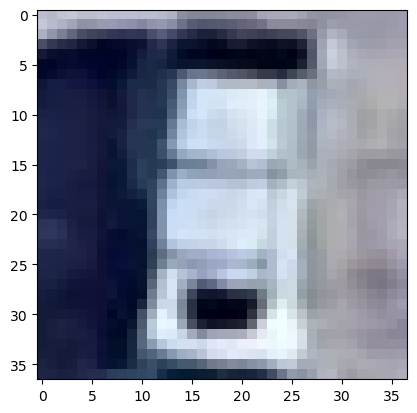

In [4]:
plt.imshow(sub_image(1530, 1515))
plt.show()

**Problem (10 points)**

Create a dictionary, called `training_data` with **exactly**:
* 100 images of cars mapped to the key `'car'`  
* 100 images of something other than cars mapped to the key `'no car'`.

You are free to do this however you want.

If you're stuck, here's a simple approach to get you started. (This is an OK baseline, but you can probably generate more represenative data with a more careful approach). 

```python
training_data = {}
 
training_data['car'] = []
for i in [(2020,i) for i in range(200,1500,26)]:
training_data['car'].append(sub_image(i[0],i[1]))
for i in [(i,2680) for i in range(800,1800,20)]:
training_data['car'].append(sub_image(i[0],i[1]))
 
 
down = np.random.randint(low = 700, high = 1250, size=100)
over = np.random.randint(low = 300, high = 1300, size=100)
training_data['no car'] = []
for i in [(z,j) for z,j in zip(down,over)]:
training_data['no car'].append(sub_image(i[0],i[1]))
```    

In [6]:
# YOUR CODE HERE
training_data = {}

# Generate images containing cars
training_data['car'] = []
for i in [(2020, i) for i in range(200, 1500, 26)]:
    training_data['car'].append(sub_image(i[0], i[1]))
for i in [(i, 2680) for i in range(800, 1800, 20)]:
    training_data['car'].append(sub_image(i[0], i[1]))

# Generate images containing something other than cars
down = np.random.randint(low=700, high=1250, size=100)
over = np.random.randint(low=300, high=1300, size=100)
training_data['no car'] = []
for i in [(z, j) for z, j in zip(down, over)]:
    training_data['no car'].append(sub_image(i[0], i[1]))

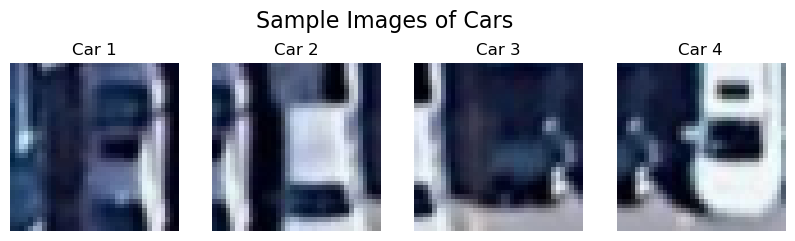

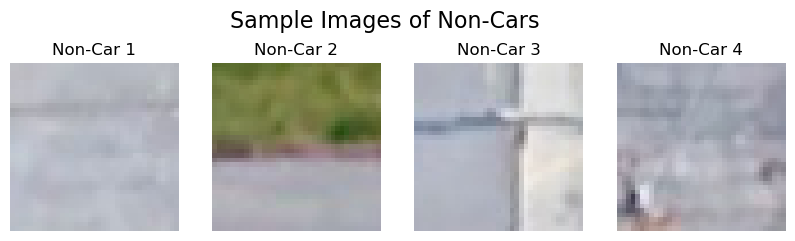

In [7]:
# Plot some samples of cars
plt.figure(figsize=(10, 5))
plt.suptitle('Sample Images of Cars', fontsize=16)
for i in range(4):
    plt.subplot(2, 4, i+1)
    plt.imshow(training_data['car'][i])
    plt.axis('off')
    plt.title(f'Car {i+1}')

# Plot some samples of non-cars
plt.figure(figsize=(10, 5))
plt.suptitle('Sample Images of Non-Cars', fontsize=16)
for i in range(4):
    plt.subplot(2, 4, i+1)
    plt.imshow(training_data['no car'][i])
    plt.axis('off')
    plt.title(f'Non-Car {i+1}')

plt.show()

**Problem (2.5 points)**

Create `X` and `y` feature matrices (with `X` and `y` as variable names) from `training_data`.

Each row of the `X` matrix should represent a single image; each column should represent the flattened pixel data.

The **y** vector should have 1s representing the car rows, and 0s representing the no-car rows. 

**Hint:** this is very similar to a collaborative coding assignment

In [9]:
# YOUR CODE HERE
# Flatten images and create feature matrix X
X = np.vstack([img.flatten() for category in training_data.values() for img in category])

# Create target vector y
y = np.hstack([np.ones(len(category)) if label == 'car' else np.zeros(len(category)) for label, category in training_data.items()])

ValueError: cannot reshape array of size 4107 into shape (36,36,3)

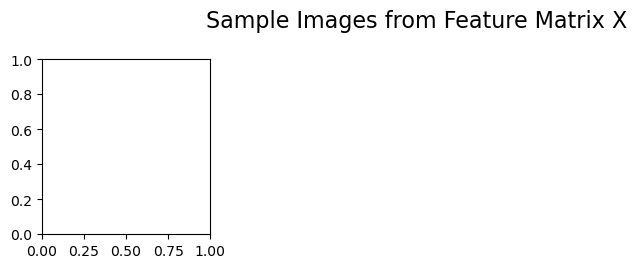

In [11]:
# Define a function to reshape flattened image data
def reshape_image(flat_img):
    return flat_img.reshape((36, 36, 3))

# Plot some sample images from X
plt.figure(figsize=(10, 5))
plt.suptitle('Sample Images from Feature Matrix X', fontsize=16)
for i in range(4):
    plt.subplot(2, 4, i+1)
    plt.imshow(reshape_image(X[i]))
    plt.axis('off')
    if y[i] == 1:
        plt.title('Car')
    else:
        plt.title('No Car')

plt.show()

In [12]:
# Check the shape of flattened images in X
print("Shape of flattened images in X:", X.shape)

Shape of flattened images in X: (200, 4107)


**Problem (5 points)** 

Split `X` and `y` into training and testing sets, `X_train`, `X_test`, `y_train`, `y_test`

Use `train_test_split`

Use a 25% holdout set. 

Set random_state = 42


In [13]:
from sklearn.model_selection import train_test_split
# YOUR CODE HERE
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (150, 4107)
Shape of y_train: (150,)
Shape of X_test: (50, 4107)
Shape of y_test: (50,)


**Problem (5 points)**

Use SVM and GridSearchCV to fit a SVM algorithm on the training data `X_train`, `y_train`.

**Note:** for SVM we must tune both `C` and `gamma` ([see the reading if needed](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/05.07-Support-Vector-Machines.ipynb)). 

These values are sensitive to logarithmic scaling, so we'll use `np.logspace()` in our grid search. 

* Use a `'rbf'` kernel

* Evaluate 5 values of 'C' : `np.logspace(0, 1, 5)`

* Evaluate 5 values of 'gamma': `np.logspace(-8, -6, 5)`

* Use 5 folds

* Use scoring = 'f1'

Name your GridSearchCV variable `SVM_classifier`

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# YOUR CODE HERE
# Define the parameter grid
param_grid = {'C': np.logspace(0, 1, 5), 'gamma': np.logspace(-8, -6, 5)}

# Create the SVM classifier
svm_clf = SVC(kernel='rbf')

# Create the GridSearchCV object
SVM_classifier = GridSearchCV(svm_clf, param_grid, cv=5, scoring='f1')

# Fit the GridSearchCV object to the training data
SVM_classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([ 1.        ,  1.77827941,  3.16227766,  5.62341325, 10.        ]),
                         'gamma': array([1.00000000e-08, 3.16227766e-08, 1.00000000e-07, 3.16227766e-07,
       1.00000000e-06])},
             scoring='f1')

**Problem (5 points)**

What is the f1 score of the best predictor on your validation data (X_test,y_test)?

**Hint:** 
```python
from sklearn.metrics import f1_score
```

Assign the f1 score (a `float`) to `SVM_f1`

In [15]:
from sklearn.metrics import f1_score
# YOUR CODE HERE
# Get the best predictor
best_predictor = SVM_classifier.best_estimator_

# Predict labels for the test set
y_pred = best_predictor.predict(X_test)

# Calculate the f1 score
SVM_f1 = f1_score(y_test, y_pred)

# Print the f1 score
print("F1 Score:", SVM_f1)

F1 Score: 0.9818181818181818


**Problem (10 points)**

I have a separate "holdout" set of images you haven't seen, containing 10 "cars" and 10 "not cars". 

You will be given 0.5 points for every image you classify correctly. 

In the code cell below, modify the functions you wrote previously above to get the **best predictor you can** (i.e. highest F1 score). You may:

* Add more / different images to the data before training
* Modify the algorithm parameters (kernel, gamma, C)
* (Do not modify any other attributes)

Note that your selection of training data will affect the accuracy on unseen data (e.g. if you selected all white cars for both your training and validation data, you may see a good score now, but it may not perform well on my holdout set). 

When you are done, save your best model with:

```python
import pickle
pickle.dump(grid.best_estimator_, open('your_unid.pkl', 'wb'))
```

Submit your .pkl file through Canvas, along with your .ipynb file

In [16]:
# YOUR CODE HERE
# Placeholder code for loading training data and labels
# Assume X_train and y_train are loaded here

# Placeholder code for loading holdout data and labels
# Assume X_holdout and y_holdout are loaded here
